In [1]:
import os
os.environ['THEANO_FLAGS'] = "'device=cpu'"
os.environ['KERAS_BACKEND'] = "tensorflow"

In [6]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

from mhcflurry.dataset import Dataset
from mhcflurry.peptide_encoding import indices_to_hotshot_encoding
from mhcflurry.regression_target import ic50_to_regression_target

In [3]:
file_to_explore="/root/.local/share/mhcflurry/2/class1_data/combined_human_class1_dataset.csv"
dataset = Dataset.from_csv(
        filename=file_to_explore,
        sep=",",
        peptide_column_name="peptide")

In [4]:
df = dataset.to_dataframe()
df.columns

Index([u'species', u'allele', u'peptide', u'peptide_length', u'affinity', u'sample_weight'], dtype='object')

In [5]:
df[df.species == 'human'].groupby('affinity').size().order().tail(10)

/usr/lib/python2.7/dist-packages/pandas/core/series.py:1807: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  good = -bad


affinity
77922.077922      530
69767.441860      656
70000.000000      761
77777.777778      796
50000.000000      809
70422.535211      816
78125.000000     1382
5000.000000      2124
1.000000         3204
20000.000000    48651
dtype: int64

In [7]:
df_reduced = df[df.allele.isin(['HLA-A0201', 'HLA-A2301', 'HLA-A2402', 'HLA-A1101'])][['allele','affinity']].reset_index(drop=True)

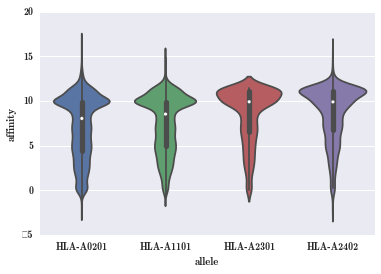

In [8]:
sns.violinplot(x=df_reduced['allele'], y=np.log(df_reduced['affinity']))

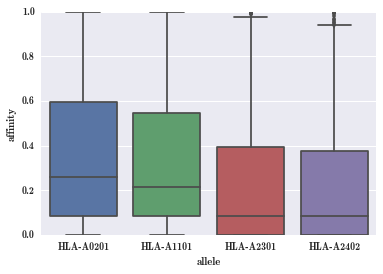

In [36]:
scaled_affinity = ic50_to_regression_target(df_reduced['affinity'])
sns.boxplot(x=df_reduced['allele'], y=scaled_affinity)

In [38]:
df_reduced.groupby('allele').size()

allele
HLA-A0201    12215
HLA-A1101     6343
HLA-A2301     2509
HLA-A2402     3320
dtype: int64

In [39]:
df_kmers = dataset.kmer_index_encoding()
training_hotshot = indices_to_hotshot_encoding(df_kmers[0])
training_labels = ic50_to_regression_target(df_kmers[1])

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(input_dim=189, output_dim=1))
model.add(Activation("sigmoid"))
model.compile(loss="mse", optimizer="rmsprop")

In [ ]:
model.fit(training_hotshot, training_labels, nb_epoch=5, batch_size=1)

Epoch 1/5
   637/688472 [..............................] - ETA: 2234s - loss: 0.0757